<a href="https://colab.research.google.com/github/albarorent/Cafeter-a/blob/master/Modelos_difusos_para_el_diagn%C3%B3stico_de_periodontitis_en_los_adultos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# instalar dependendcia para algoritmos difusos
!pip install -U scikit-fuzzy

In [ ]:
#importacion de librerias a utilizar
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score, classification_report
import skfuzzy as fuzz
import time
import sys
import matplotlib.pyplot as plt
sns.set(color_codes=True)
%matplotlib inline
from sklearn.preprocessing import LabelEncoder

In [ ]:
#importar el dataset
import io
from google.colab import files
cargarArchivo = files.upload()

Saving DatasetPeriodontal.csv to DatasetPeriodontal (1).csv


In [ ]:
#cargar dataset de enfemerdad de periodontitis y visualizar sus instancias
df=pd.read_csv("DatasetPeriodontal.csv",encoding='utf-8')
df.head(36)#mostrar todos los ejemplos


,GENERO,EDAD,PESO,ENFERMEDAD ACTUAL,HALITOSIS,SANGRADO GINGIVAL,DOLOR,RETRACCION DE LAS ENCIAS CON SENSACION DE DEINTES MAS LARGOS Y HUECOS ENTRE ELLOS,CAIDAD DE DIENTES POR PERIODONTITIS,PERDIDA OSEA HORIZONTAL,...,CDI_D,CDI_V,CDI_M,ILDI_D,ILDI_V,ILDI_M,ICDI_D,ICDI_V,ICDI_M,ESTADIOS
0,1,2,1,0,1,1,1,0,0,0,...,2,3,3,3,2,3,3,2,2,inicial
1,1,3,1,1,1,1,1,0,0,0,...,4,4,4,4,4,4,3,4,3,inicial
2,1,3,1,1,1,1,1,0,0,0,...,4,4,4,4,4,4,3,4,3,inicial
3,1,1,1,0,1,1,1,0,0,0,...,4,4,4,4,4,4,3,4,3,inicial
4,1,1,1,0,1,1,1,0,0,0,...,4,4,4,4,4,4,3,4,3,inicial
5,2,2,1,0,1,1,1,0,0,0,...,2,3,3,3,2,3,3,2,2,inicial
6,1,4,1,0,1,1,1,0,0,0,...,4,4,4,4,4,4,0,0,0,inicial
7,1,3,1,0,1,1,1,0,0,0,...,4,4,4,4,4,4,3,4,3,inicial
8,1,1,2,0,1,1,1,0,0,0,...,2,3,3,3,2,3,3,2,2,inicial
9,2,2,2,0,1,1,1,0,0,0,...,4,4,4,4,4,4,3,4,3,inicial


import numpy as np
from google.colab import autoviz
df_3209196523578794788 = autoviz.get_registered_df('df_3209196523578794788')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_3209196523578794788, *['GENERO'], **{})
chart

import numpy as np
from google.colab import autoviz
df_3209196523578794788 = autoviz.get_registered_df('df_3209196523578794788')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_3209196523578794788, *['EDAD'], **{})
chart

import numpy as np
from google.colab import autoviz
df_3209196523578794788 = autoviz.get_registered_df('df_3209196523578794788')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_3209196523578794788, *['PESO '], **{})
chart

import numpy as np
from google.colab import autoviz
df_3209196523578794788 = autoviz.get_registered_df('df_3209196523578794788')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_3209196523578794788, *['ENFERMEDAD ACTUAL'], **{})
chart

import numpy as np
from google.colab import autoviz
df_3209196523578794788 = autoviz.get_registered_df('df_3209196523578794788')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_3209196523578794788, *['GENERO'], **{})
chart

import numpy as np
from google.colab import autoviz
df_3209196523578794788 = autoviz.get_registered_df('df_3209196523578794788')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_3209196523578794788, *['EDAD'], **{})
chart

import numpy as np
from google.colab import autoviz
df_3209196523578794788 = autoviz.get_registered_df('df_3209196523578794788')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_3209196523578794788, *['PESO '], **{})
chart

import numpy as np
from google.colab import autoviz
df_3209196523578794788 = autoviz.get_registered_df('df_3209196523578794788')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_3209196523578794788, *['ENFERMEDAD ACTUAL'], **{})
chart

import numpy as np
from google.colab import autoviz
df_3209196523578794788 = autoviz.get_registered_df('df_3209196523578794788')

def categorical_histogram(df, colname, figsize=(2, 1.2), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  _, ax = plt.subplots(figsize=figsize)
  bars = df[colname].value_counts()
  plt.barh(bars.index, bars.values, color=sns.palettes.mpl_palette(mpl_palette_name))
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(df_3209196523578794788, *['ESTADIOS'], **{})
chart

import numpy as np
from google.colab import autoviz
df_3209196523578794788 = autoviz.get_registered_df('df_3209196523578794788')

def scatter_plots(df, colname_pairs, scatter_plot_size=2.5, size=8, alpha=.6):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * scatter_plot_size, scatter_plot_size))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    ax.scatter(df[x_colname], df[y_colname], s=size, alpha=alpha)
    plt.xlabel(x_colname)
    plt.ylabel(y_colname)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(df_3209196523578794788, *[[['GENERO', 'EDAD'], ['EDAD', 'PESO '], ['PESO ', 'ENFERMEDAD ACTUAL'], ['ENFERMEDAD ACTUAL', 'SANGRADO GINGIVAL']]], **{})
chart

import numpy as np
from google.colab import autoviz
df_3209196523578794788 = autoviz.get_registered_df('df_3209196523578794788')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_3209196523578794788, *['GENERO', 'ESTADIOS'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz
df_3209196523578794788 = autoviz.get_registered_df('df_3209196523578794788')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_3209196523578794788, *['EDAD', 'ESTADIOS'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz
df_3209196523578794788 = autoviz.get_registered_df('df_3209196523578794788')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_3209196523578794788, *['PESO ', 'ESTADIOS'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz
df_3209196523578794788 = autoviz.get_registered_df('df_3209196523578794788')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_3209196523578794788, *['ENFERMEDAD ACTUAL', 'ESTADIOS'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz
df_3209196523578794788 = autoviz.get_registered_df('df_3209196523578794788')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_3209196523578794788, *['GENERO'], **{})
chart

import numpy as np
from google.colab import autoviz
df_3209196523578794788 = autoviz.get_registered_df('df_3209196523578794788')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_3209196523578794788, *['EDAD'], **{})
chart

import numpy as np
from google.colab import autoviz
df_3209196523578794788 = autoviz.get_registered_df('df_3209196523578794788')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_3209196523578794788, *['PESO '], **{})
chart

import numpy as np
from google.colab import autoviz
df_3209196523578794788 = autoviz.get_registered_df('df_3209196523578794788')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_3209196523578794788, *['ENFERMEDAD ACTUAL'], **{})
chart

import numpy as np
from google.colab import autoviz
df_3209196523578794788 = autoviz.get_registered_df('df_3209196523578794788')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_3209196523578794788, *['GENERO'], **{})
chart

import numpy as np
from google.colab import autoviz
df_3209196523578794788 = autoviz.get_registered_df('df_3209196523578794788')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_3209196523578794788, *['EDAD'], **{})
chart

import numpy as np
from google.colab import autoviz
df_3209196523578794788 = autoviz.get_registered_df('df_3209196523578794788')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_3209196523578794788, *['PESO '], **{})
chart

import numpy as np
from google.colab import autoviz
df_3209196523578794788 = autoviz.get_registered_df('df_3209196523578794788')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_3209196523578794788, *['ENFERMEDAD ACTUAL'], **{})
chart

import numpy as np
from google.colab import autoviz
df_3209196523578794788 = autoviz.get_registered_df('df_3209196523578794788')

def categorical_histogram(df, colname, figsize=(2, 1.2), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  _, ax = plt.subplots(figsize=figsize)
  bars = df[colname].value_counts()
  plt.barh(bars.index, bars.values, color=sns.palettes.mpl_palette(mpl_palette_name))
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(df_3209196523578794788, *['ESTADIOS'], **{})
chart

import numpy as np
from google.colab import autoviz
df_3209196523578794788 = autoviz.get_registered_df('df_3209196523578794788')

def scatter_plots(df, colname_pairs, scatter_plot_size=2.5, size=8, alpha=.6):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * scatter_plot_size, scatter_plot_size))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    ax.scatter(df[x_colname], df[y_colname], s=size, alpha=alpha)
    plt.xlabel(x_colname)
    plt.ylabel(y_colname)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(df_3209196523578794788, *[[['GENERO', 'EDAD'], ['EDAD', 'PESO '], ['PESO ', 'ENFERMEDAD ACTUAL'], ['ENFERMEDAD ACTUAL', 'SANGRADO GINGIVAL']]], **{})
chart

import numpy as np
from google.colab import autoviz
df_3209196523578794788 = autoviz.get_registered_df('df_3209196523578794788')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_3209196523578794788, *['GENERO', 'ESTADIOS'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz
df_3209196523578794788 = autoviz.get_registered_df('df_3209196523578794788')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_3209196523578794788, *['EDAD', 'ESTADIOS'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz
df_3209196523578794788 = autoviz.get_registered_df('df_3209196523578794788')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_3209196523578794788, *['PESO ', 'ESTADIOS'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz
df_3209196523578794788 = autoviz.get_registered_df('df_3209196523578794788')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_3209196523578794788, *['ENFERMEDAD ACTUAL', 'ESTADIOS'], **{'inner': 'stick'})
chart

In [ ]:
#Resumen del dataset -  muestra el total de filas y columnas
print(df.shape)

(36, 110)


In [ ]:
#Informacion del dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Columns: 110 entries, GENERO to ESTADIOS
dtypes: int64(109), object(1)
memory usage: 31.1+ KB
None


In [ ]:
#medidas de tendencia central/datos estadisticos
print(df.describe())

          GENERO       EDAD      PESO   ENFERMEDAD ACTUAL  HALITOSIS  \
count  36.000000  36.000000  36.000000          36.000000       36.0   
mean    1.472222   2.916667   1.333333           0.250000        1.0   
std     0.506309   1.079021   0.478091           0.439155        0.0   
min     1.000000   1.000000   1.000000           0.000000        1.0   
25%     1.000000   2.000000   1.000000           0.000000        1.0   
50%     1.000000   3.000000   1.000000           0.000000        1.0   
75%     2.000000   4.000000   2.000000           0.250000        1.0   
max     2.000000   4.000000   2.000000           1.000000        1.0   

       SANGRADO GINGIVAL  DOLOR  \
count          36.000000   36.0   
mean            1.555556    1.0   
std             0.652225    0.0   
min             1.000000    1.0   
25%             1.000000    1.0   
50%             1.000000    1.0   
75%             2.000000    1.0   
max             3.000000    1.0   

       RETRACCION DE LAS ENCIAS CON

In [ ]:
#Distribución de las clases
print(df.groupby('ESTADIOS').size())

ESTADIOS
avanzada     3
inicial     16
moderada    15
severa       2
dtype: int64


In [ ]:
# Preprocesar los datos
label_encoder = LabelEncoder()
df['ESTADIOS'] = label_encoder.fit_transform(df['ESTADIOS'])

In [ ]:
# Obtener las características y las etiquetas
# X = df[['genero', 'edad', 'peso', 'enfemerdad actual', 'halitosis', 'sangrado gingival', 'dolor', 'retraccion de la encias con sensacion de dientes mas y huecos entre ellos', 'caida de dientes por periodontitis', 'perdida horizontal osea', 'movilidad de los dientes', 'perdida osea vertical', 'disfuncion masticadora', 'TMIS_D',	'TMIS_V',	'TMIS_M',	'SMIS_D',	'SMIS_V',	'SMIS_M',	'PMIS_D',	'PMIS_V',	'PMIS_M',	'SPMIS_D',	'SPMIS_V',	'SPMIS_M',	'PPIS_D',	'PPIS_V',	'PPIS_M',	'CIS_D','	CIS_V',	'CIS_M',	'ILIS_D',	'ILIS_V',	'ILIS_M',	'ICIS_D',	'ICIS_V',	'ICIS_M',	'TMDS_D',	'TMDS_V', 'TMDS_M',	'SMDS_D',	'SMDS_V',	'SMDS_M',	'PMDS_D',	'PMDS_V',	'PMDS_M',	'SMDS_D',	'SMDS_V',	'SMDS_M',	'PPDS_D',	'PPDS_V',	'PPDS_M',	'CDS_D',	'CDS_V',	'CDS_M',	'ILDS_D',	'ILDS_V',	'ILDS_M',	'ICDS_D',	'ICDS_V',	'ICDS_M','TMII_D',	'TMII_V',	'TMII_M',	'SMII_D',	'SMII_V',	'SMII_M',	'PMII_D',	'PMII_V',	'PMII_M',	'SPMII_D',	'SPMII_V',	'SPMII_M',	'PPII_D',	'PPII_V',	'PPII_M',	'CII_D',	'CII_V',	'CII_M',	'ILII_D',	'ILII_V',	'ILII_M',	'ICII_D','ICII_V','ICII_M',	'TMDI_D',	'TMDI_V',	'TMDI_M',	'SMDI_D',	'SMDI_V',	'SMDI_M',	'PMDI_D',	'PMDI_V',	'PMDI_M',	'SMDI_D',	'SMDI_V',	'SMDI_M',	'PPDI_D',	'PPDI_V',	'PPDI_M',	'CDI_D',	'CDI_V',	'CDI_M',	'ILDI_D',	'ILDI_V',	'ILDI_M',	'ICDI_D',	'ICDI_V',	'ICDI_M']].values
X = df.iloc[:,0:109]
y = df['ESTADIOS'].values

#En este caso se omite dividir el dataset con la finalidad de procesar el 100 % de los datos

<h1 style="color:red">TÉCNICAS DE AGRUPAMIENTO DIFUSO</h1>

El algoritmo Fuzzy C-Means (FCM) es un algoritmo de agrupamiento que utiliza lógica difusa para asignar grados de pertenencia de los puntos a múltiples clusters. Similar al algoritmo K-Means, el Fuzzy C-Means busca agrupar los datos en clusters de manera que se minimice la varianza intra-cluster y se maximice la separación entre los clusters. Sin embargo, a diferencia del K-Means, el FCM permite que cada punto tenga una pertenencia parcial a varios clusters

In [ ]:
# Definir los parámetros del algoritmo FCM
c = 4  # Número de clusters
m = 20  # Parámetro de pesado

# Aplicar el algoritmo FCM
start_time = time.time()  # Iniciar conteo del tiempo de ejecución
# Entrenar el modelo con el algoritmo FCM
cntr, u_orig, _, _, _, _, _ = fuzz.cluster.cmeans(
    X.T, c=c, m=m, error=0.005, maxiter=1000, init=None, seed=0
)

# Predecir usando el modelo entrenado
u_test, _, _, _, _, _ = fuzz.cluster.cmeans_predict(
    X.T, cntr, m=m, error=0.005, maxiter=1000
)
end_time = time.time()  # Finalizar conteo del tiempo de ejecución
execution_time = end_time - start_time  # Calcular tiempo de ejecución

# Obtener las etiquetas predichas
y_pred = np.argmax(u_test, axis=0)  # Corrección: axis=0 en lugar de axis=1


In [ ]:
# Calcular métricas de evaluación
accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred, average='weighted')
recall = recall_score(y, y_pred, average='weighted')
f1 = f1_score(y, y_pred, average='weighted')
confusion_mat = confusion_matrix(y, y_pred)

# Corrección: Calcular especificidad utilizando la matriz de confusión
true_negative = confusion_mat[0, 0]
false_positive = confusion_mat[0, :].sum() - true_negative
specificity = true_negative / (true_negative + false_positive)

classification_rep = classification_report(y, y_pred, zero_division=1)

# Obtener almacenamiento utilizado por el objeto
storage_size = sys.getsizeof(cntr) + sys.getsizeof(u_orig) + sys.getsizeof(u_test)

# Imprimir resultados
print("Precisión: {:.2f}%".format(precision * 100))
print("Exactitud: {:.2f}%".format(accuracy * 100))
print("Especificidad: {:.2f}%".format(specificity * 100))  # Corrección: usar la especificidad calculada
print("Puntuación F1: {:.2f}%".format(f1 * 100))
print("Matriz de confusión:\n", confusion_mat)
print("Reporte de clasificación:\n", classification_rep)

# Imprimir el almacenamiento
storage_size_kb = storage_size / 1024  # Convertir a kilobytes
storage_size_mb = storage_size / (1024 * 1024)  # Convertir a megabytes
print("Almacenamiento Utilizado: {} bytes, {} KB, {} MB".format(storage_size, storage_size_kb, storage_size_mb))

# Imprimir el tiempo de ejecución
minutes = int(execution_time / 60)
seconds = int(execution_time % 60)
milliseconds = int((execution_time % 1) * 1000)
print("Tiempo de Ejecución: {} minutos, {} segundos, {} milisegundos".format(minutes, seconds, milliseconds))

Precisión: 18.52%
Exactitud: 11.11%
Especificidad: 0.00%
Puntuación F1: 13.89%
Matriz de confusión:
 [[ 0  0  3  0]
 [15  0  1  0]
 [10  0  4  1]
 [ 1  0  1  0]]
Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       1.00      0.00      0.00        16
           2       0.44      0.27      0.33        15
           3       0.00      0.00      0.00         2

    accuracy                           0.11        36
   macro avg       0.36      0.07      0.08        36
weighted avg       0.63      0.11      0.14        36

Almacenamiento Utilizado: 6176 bytes, 6.03125 KB, 0.005889892578125 MB
Tiempo de Ejecución: 0 minutos, 0 segundos, 13 milisegundos


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


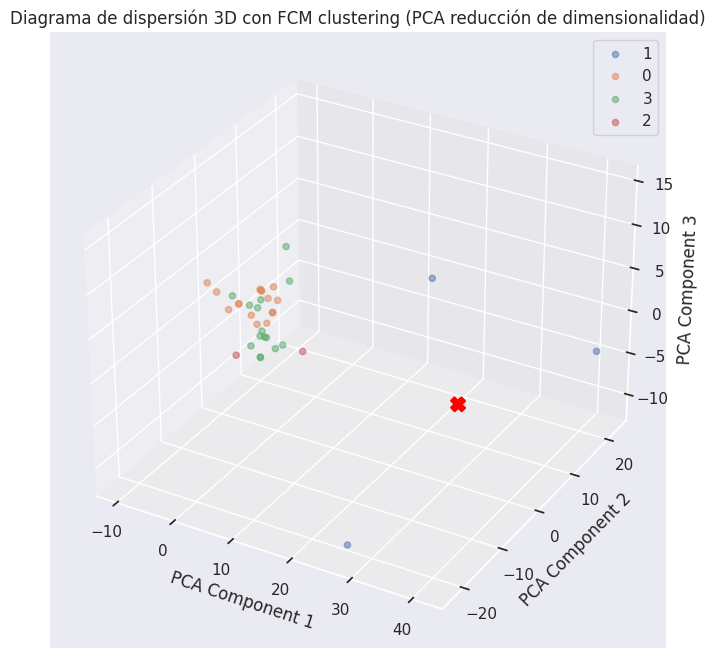

In [ ]:
# Importar librerías necesarias
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Generar el gráfico de dispersión 3D con las variables lingüísticas de ESTADIOS
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Graficar cada categoría por separado
for categoria_num in range(num_categorias):
    ax.scatter(
        X_pca[y == categoria_num, 0],
        X_pca[y == categoria_num, 1],
        X_pca[y == categoria_num, 2],
        label=categorias_estadios[categoria_num],  # Mostrar el nombre de la categoría en la leyenda
        alpha=0.5
    )

# Graficar los centros de los clusters proyectados en el espacio PCA
ax.scatter(centros_pca[:, 0], centros_pca[:, 1], centros_pca[:, 2], c='red', marker='X', s=100)

# Etiquetas de los ejes
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')

# Título del gráfico
ax.set_title('Diagrama de dispersión 3D con FCM clustering (PCA reducción de dimensionalidad)')

# Mostrar leyenda con las categorías de ESTADIOS y sus respectivas etiquetas
ax.legend(labels=categorias_estadios)

# Mostrar el gráfico
plt.show()

El algoritmo Fuzzy K-Means (Fuzzy k-means) es una variante del algoritmo K-Means que utiliza lógica difusa para asignar grados de pertenencia de los puntos a múltiples clusters. A diferencia del K-Means tradicional, donde cada punto pertenece a un único cluster, en el Fuzzy K-Means cada punto puede tener una pertenencia parcial a varios clusters.

In [ ]:
# Definir los parámetros del algoritmo Fuzzy k-means (FKM)
c = 4  # Número de clusters
m = 19  # Parámetro de pesado
error = 0.005  # Tolerancia de error
maxiter = 1000  # Número máximo de iteraciones

# Aplicar el algoritmo Fuzzy k-means (FKM)
start_time = time.time()
centers, u, _, _, _, _, _ = fuzz.cluster.cmeans(
    X.T, c=c, m=m, error=error, maxiter=maxiter
)
end_time = time.time()
execution_time = end_time - start_time

# Obtener las etiquetas predichas
y_pred = np.argmax(u, axis=0)

In [ ]:
# Calcular métricas de evaluación
accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred, average='weighted')
recall = recall_score(y, y_pred, average='weighted')
f1 = f1_score(y, y_pred, average='weighted')
confusion_mat = confusion_matrix(y, y_pred)
classification_rep = classification_report(y, y_pred, zero_division=1)

# Obtener almacenamiento utilizado por el objeto (usamos X en lugar de cntr)
storage_size = sys.getsizeof(X) + sys.getsizeof(u)

#imprimir resultados
print("Precisión: {:.2f}%".format(precision * 100))
print("Exactitud: {:.2f}%".format(accuracy * 100))
print("Especificidad: {:.2f}%".format(recall * 100))
print("Puntuación F1: {:.2f}%".format(f1 * 100))
print("Matriz de confusión:\n", confusion_mat)
print("Reporte de clasificación:\n", classification_rep)

#imprimir el almacenamiento
storage_size_kb = storage_size / 1024  # Convertir a kilobytes
storage_size_mb = storage_size / (1024 * 1024)  # Convertir a megabytes
print("Almacenamiento Utilizado: {} bytes, {} KB, {} MB".format(storage_size, storage_size_kb, storage_size_mb))

#imprimir el tiempo de ejecusión
minutes = int(execution_time / 60)
seconds = int(execution_time % 60)
milliseconds = int((execution_time % 1) * 1000)
print("Tiempo de Ejecución: {} minutos, {} segundos, {} milisegundos".format(minutes, seconds, milliseconds))

Precisión: 36.46%
Exactitud: 19.44%
Especificidad: 19.44%
Puntuación F1: 25.36%
Matriz de confusión:
 [[ 0  3  0  0]
 [16  0  0  0]
 [ 2  2  7  4]
 [ 0  1  1  0]]
Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.00      0.00      0.00        16
           2       0.88      0.47      0.61        15
           3       0.00      0.00      0.00         2

    accuracy                           0.19        36
   macro avg       0.22      0.12      0.15        36
weighted avg       0.36      0.19      0.25        36

Almacenamiento Utilizado: 32816 bytes, 32.046875 KB, 0.0312957763671875 MB
Tiempo de Ejecución: 0 minutos, 0 segundos, 10 milisegundos


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


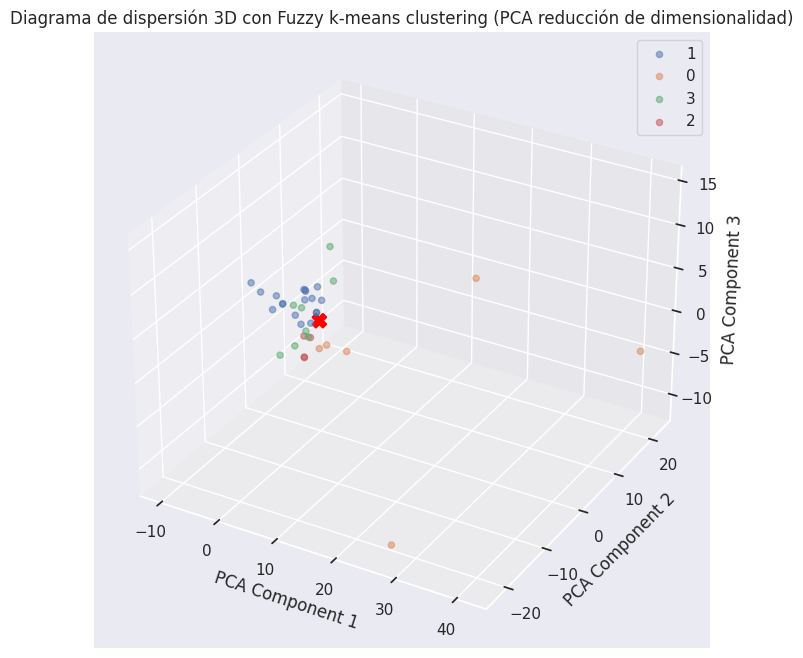

In [ ]:
# Proyectar los datos y los centros de los clusters en el espacio PCA
X_pca = pca.transform(X)
centros_pca = pca.transform(centers)

# Generar el gráfico de dispersión 3D con las variables lingüísticas de ESTADIOS
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Graficar cada categoría por separado
for categoria_num in range(num_categorias):
    ax.scatter(
        X_pca[y_pred == categoria_num, 0],
        X_pca[y_pred == categoria_num, 1],
        X_pca[y_pred == categoria_num, 2],
        label=categorias_estadios[categoria_num],  # Mostrar el nombre de la categoría en la leyenda
        alpha=0.5
    )

# Graficar los centros de los clusters proyectados en el espacio PCA
ax.scatter(centros_pca[:, 0], centros_pca[:, 1], centros_pca[:, 2], c='red', marker='X', s=100)

# Etiquetas de los ejes
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')

# Título del gráfico
ax.set_title('Diagrama de dispersión 3D con Fuzzy k-means clustering (PCA reducción de dimensionalidad)')

# Mostrar leyenda con las categorías de ESTADIOS y sus respectivas etiquetas
ax.legend(labels=categorias_estadios)

# Mostrar el gráfico
plt.show()

Fuzzy Possibilistic C-Means (FPCM) es una variante del algoritmo Fuzzy C-Means (FCM) que introduce la noción de incertidumbre en las matrices de pertenencia. A diferencia del FCM, donde los valores de pertenencia representan la probabilidad de pertenecer a un cluster, en el FPCM los valores de pertenencia representan la posibilidad o grado de pertenencia a un cluster.

In [ ]:
# Definir los parámetros del algoritmo FCPM
n_clusters = 4  # Número de clusters
m = 3  # Parámetro de exponente difuso

# Convertir los datos a matrices numpy
X_np = X.values.T

# Aplicar el algoritmo FCPM
start_time = time.time()
cntr, u_orig, _, _, _, _, _ = fuzz.cluster.cmeans(
    X_np, n_clusters, m, error=0.005, maxiter=1000, init=None
)
end_time = time.time()
execution_time = end_time - start_time

# Ajustar los valores de pertenencia para simular FCPM
u_fpcm = u_orig ** m

# Obtener las etiquetas predichas
y_pred = np.argmax(u_fpcm, axis=0)

In [ ]:
# Calcular métricas de evaluación
accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred, average='weighted')
recall = recall_score(y, y_pred, average='weighted')
f1 = f1_score(y, y_pred, average='weighted')
confusion_mat = confusion_matrix(y, y_pred)
classification_rep = classification_report(y, y_pred, zero_division=1)

#imprimir resultados
print("Precisión: {:.2f}%".format(precision * 100))
print("Exactitud: {:.2f}%".format(accuracy * 100))
print("Especificidad: {:.2f}%".format(recall * 100))
print("Puntuación F1: {:.2f}%".format(f1 * 100))
print("Matriz de confusión:\n", confusion_mat)
print("Reporte de clasificación:\n", classification_rep)

#imprimir el almacenamiento
storage_size_kb = storage_size / 1024  # Convertir a kilobytes
storage_size_mb = storage_size / (1024 * 1024)  # Convertir a megabytes
print("Almacenamiento Utilizado: {} bytes, {} KB, {} MB".format(storage_size, storage_size_kb, storage_size_mb))

#imprimir el tiempo de ejecusión
minutes = int(execution_time / 60)
seconds = int(execution_time % 60)
milliseconds = int((execution_time % 1) * 1000)
print("Tiempo de Ejecución: {} minutos, {} segundos, {} milisegundos".format(minutes, seconds, milliseconds))

Precisión: 29.12%
Exactitud: 52.78%
Especificidad: 52.78%
Puntuación F1: 37.24%
Matriz de confusión:
 [[ 3  0  0  0]
 [ 0 16  0  0]
 [ 5 10  0  0]
 [ 1  1  0  0]]
Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.33      1.00      0.50         3
           1       0.59      1.00      0.74        16
           2       1.00      0.00      0.00        15
           3       1.00      0.00      0.00         2

    accuracy                           0.53        36
   macro avg       0.73      0.50      0.31        36
weighted avg       0.76      0.53      0.37        36

Almacenamiento Utilizado: 32816 bytes, 32.046875 KB, 0.0312957763671875 MB
Tiempo de Ejecución: 0 minutos, 0 segundos, 5 milisegundos


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


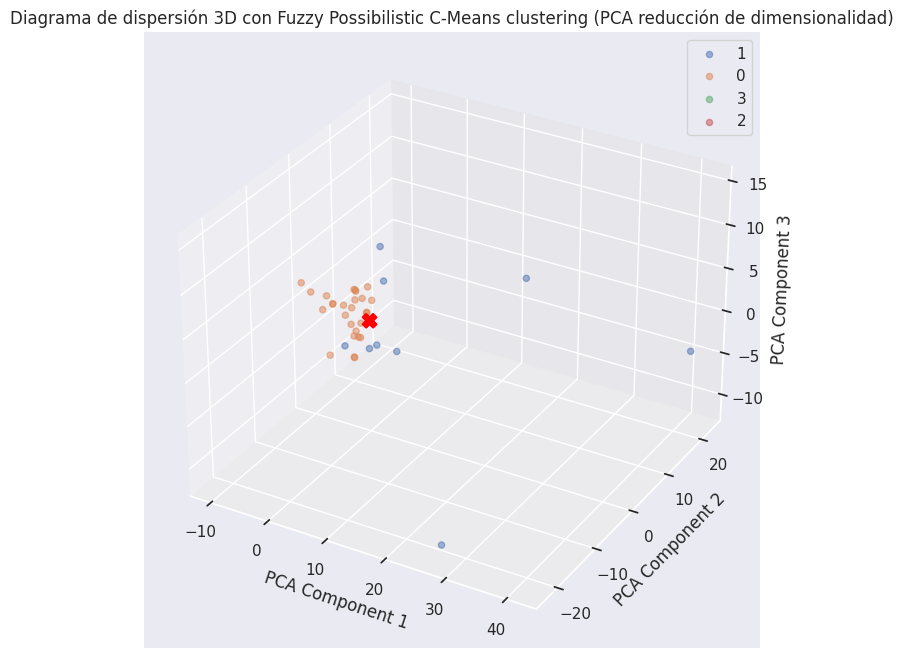

In [ ]:
# Proyectar los datos y los centros de los clusters en el espacio PCA
X_pca = pca.transform(X)
centros_pca = pca.transform(cntr)

# Generar el gráfico de dispersión 3D con las variables lingüísticas de ESTADIOS
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Graficar cada categoría por separado
for categoria_num in range(num_categorias):
    ax.scatter(
        X_pca[y_pred == categoria_num, 0],
        X_pca[y_pred == categoria_num, 1],
        X_pca[y_pred == categoria_num, 2],
        label=categorias_estadios[categoria_num],  # Mostrar el nombre de la categoría en la leyenda
        alpha=0.5
    )

# Graficar los centros de los clusters proyectados en el espacio PCA
ax.scatter(centros_pca[:, 0], centros_pca[:, 1], centros_pca[:, 2], c='red', marker='X', s=100)

# Etiquetas de los ejes
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')

# Título del gráfico
ax.set_title('Diagrama de dispersión 3D con Fuzzy Possibilistic C-Means clustering (PCA reducción de dimensionalidad)')

# Mostrar leyenda con las categorías de ESTADIOS y sus respectivas etiquetas
ax.legend(labels=categorias_estadios)

# Mostrar el gráfico
plt.show()


<h1 style="color:red">TÉCNICAS DE CLASIFICACION DIFUSA</h1>

El algoritmo FKNN (Fuzzy k-Nearest Neighbors) es una variante del algoritmo k-Nearest Neighbors (k-NN) que utiliza conceptos difusos para clasificar nuevos ejemplos en un conjunto de datos. A diferencia del k-NN tradicional, donde se utiliza una votación por mayoría de los vecinos más cercanos, el FKNN asigna grados de pertenencia difusos a cada vecino según su distancia al punto de consulta.

In [ ]:
#calcular el número de muestras en el conjunto de entrenamiento (n_samples) y el número de clases únicas en el conjunto de etiquetas de entrenamiento (n_classes)
def fuzzy_knn(X_train, y_train, X_test, k, m):
    n_samples = X_train.shape[0]
    n_classes = len(np.unique(y_train))

    # Calcular las distancias entre los puntos de prueba y entrenamiento
    dists = np.linalg.norm(X_train[:, np.newaxis] - X_test, axis=2)

    # Obtener los índices de los k vecinos más cercanos para cada punto de prueba
    knn_indices = np.argsort(dists, axis=0)[:k]

    # Calcular los grados de pertenencia de cada punto de prueba a cada clase
    u_test = np.zeros((n_classes, X_test.shape[0]))
    for i in range(X_test.shape[0]):
        knn_labels = y_train[knn_indices[:, i]]
        for j in range(n_classes):
            u_test[j, i] = np.sum(knn_labels == j) / k

    return u_test

# Definir los parámetros del algoritmo
k = 4  # Número de vecinos
m = 26  # Parámetro de pesado

# Aplicar el algoritmo Fuzzy KNN
start_time = time.time()
u_test = fuzzy_knn(X.values, y, X.values, k, m)
end_time = time.time()
execution_time = end_time - start_time

# Obtener las etiquetas predichas
y_pred = np.argmax(u_test, axis=0)

In [ ]:
# Calcular métricas de evaluación
accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred, average='weighted')
recall = recall_score(y, y_pred, average='weighted')
f1 = f1_score(y, y_pred, average='weighted')
confusion_mat = confusion_matrix(y, y_pred)
classification_rep = classification_report(y, y_pred, zero_division=1)

#imprimir resultados
print("Precisión: {:.2f}%".format(precision * 100))
print("Exactitud: {:.2f}%".format(accuracy * 100))
print("Especificidad: {:.2f}%".format(recall * 100))
print("Puntuación F1: {:.2f}%".format(f1 * 100))
print("Matriz de confusión:\n", confusion_mat)
print("Reporte de clasificación:\n", classification_rep)

#imprimir el almacenamiento
storage_size_kb = storage_size / 1024  # Convertir a kilobytes
storage_size_mb = storage_size / (1024 * 1024)  # Convertir a megabytes
print("Almacenamiento Utilizado: {} bytes, {} KB, {} MB".format(storage_size, storage_size_kb, storage_size_mb))

#imprimir el tiempo de ejecusión
minutes = int(execution_time / 60)
seconds = int(execution_time % 60)
milliseconds = int((execution_time % 1) * 1000)
print("Tiempo de Ejecución: {} minutos, {} segundos, {} milisegundos".format(minutes, seconds, milliseconds))

Precisión: 76.75%
Exactitud: 77.78%
Especificidad: 77.78%
Puntuación F1: 74.80%
Matriz de confusión:
 [[ 3  0  0  0]
 [ 0 16  0  0]
 [ 0  6  9  0]
 [ 0  1  1  0]]
Reporte de clasificación:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       0.70      1.00      0.82        16
           2       0.90      0.60      0.72        15
           3       1.00      0.00      0.00         2

    accuracy                           0.78        36
   macro avg       0.90      0.65      0.64        36
weighted avg       0.82      0.78      0.75        36

Almacenamiento Utilizado: 32816 bytes, 32.046875 KB, 0.0312957763671875 MB
Tiempo de Ejecución: 0 minutos, 0 segundos, 7 milisegundos


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


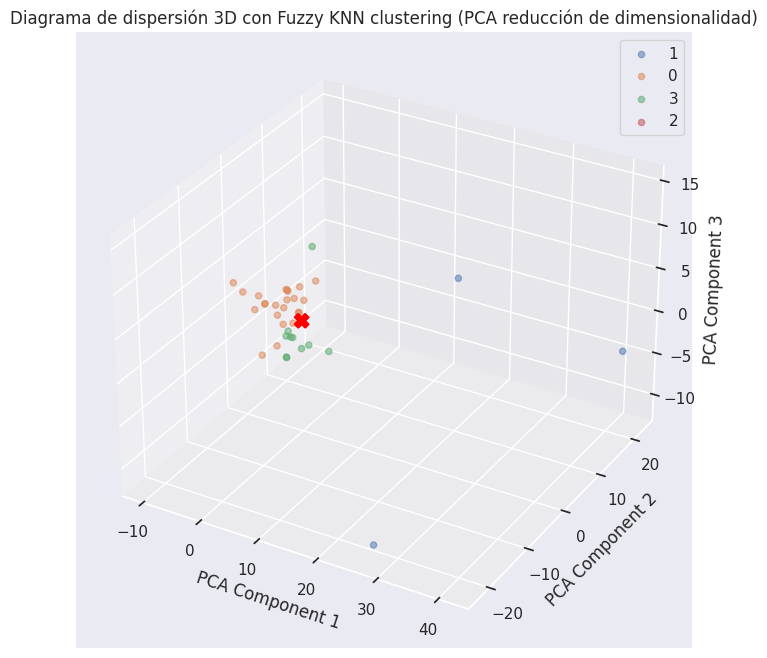

In [ ]:
# Proyectar los datos y los centros de los clusters en el espacio PCA
X_pca = pca.transform(X)
centros_pca = pca.transform(cntr)

# Generar el gráfico de dispersión 3D con las variables lingüísticas de ESTADIOS
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Graficar cada categoría por separado
for categoria_num in range(num_categorias):
    ax.scatter(
        X_pca[y_pred == categoria_num, 0],
        X_pca[y_pred == categoria_num, 1],
        X_pca[y_pred == categoria_num, 2],
        label=categorias_estadios[categoria_num],  # Mostrar el nombre de la categoría en la leyenda
        alpha=0.5
    )

# Graficar los centros de los clusters proyectados en el espacio PCA
ax.scatter(centros_pca[:, 0], centros_pca[:, 1], centros_pca[:, 2], c='red', marker='X', s=100)

# Etiquetas de los ejes
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')

# Título del gráfico
ax.set_title('Diagrama de dispersión 3D con Fuzzy KNN clustering (PCA reducción de dimensionalidad)')

# Mostrar leyenda con las categorías de ESTADIOS y sus respectivas etiquetas
ax.legend(labels=categorias_estadios)

# Mostrar el gráfico
plt.show()


<h1 style="color:red">TÉCNICAS DE LOGICA DIFUSA CLASICA</h1>

El algoritmo Takagi-Sugeno-Kang (TSK) es un tipo de Sistema de Inferencia Difusa (Fuzzy Inference System, FIS) que combina la lógica difusa con modelos lineales. Se utiliza para realizar inferencias y tomar decisiones basadas en reglas difusas y variables de entrada difusas.

In [ ]:
# Definir los parámetros del algoritmo TSK
c = 5  # Número de clusters
m = 12  # Parámetro de pesado

# Aplicar el algoritmo TSK
start_time = time.time()
cntr, u_orig, _, _, _, _, _ = fuzz.cluster.cmeans(
    X.T, c=c, m=m, error=0.005, maxiter=1000, init=None, seed=0
)

u_test, _, _, _, _, _ = fuzz.cluster.cmeans_predict(
    X.T, cntr, m=m, error=0.005, maxiter=1000
)
end_time = time.time()
execution_time = end_time - start_time

# Calcular el resultado de la inferencia difusa utilizando las funciones de pertenencia de la salida
# Para el Sistema de Inferencia Difusa Takagi-Sugeno-Kang (TSK), utilizaremos una combinación lineal de las salidas ponderadas por los centroides y se agregará un término de regresión lineal
y_pred = np.zeros_like(y)

for i in range(len(u_test)):
    for j in range(c):
        y_pred[i] += np.sum(u_test[i, j] * cntr[j]) + cntr[j][-1]

y_pred = np.round(y_pred)


In [ ]:
# Calcular métricas de evaluación
accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred, average='weighted')
recall = recall_score(y, y_pred, average='weighted')
f1 = f1_score(y, y_pred, average='weighted')
confusion_mat = confusion_matrix(y, y_pred)
classification_rep = classification_report(y, y_pred, zero_division=1)

# Imprimir resultados
print("Precisión: {:.2f}%".format(precision * 100))
print("Exactitud: {:.2f}%".format(accuracy * 100))
print("Especificidad: {:.2f}%".format(recall * 100))
print("Puntuación F1: {:.2f}%".format(f1 * 100))
print("Matriz de confusión:\n", confusion_mat)
print("Reporte de clasificación:\n", classification_rep)

# Calcular el almacenamiento utilizado por el objeto
storage_size = sys.getsizeof(cntr) + sys.getsizeof(u_orig) + sys.getsizeof(u_test)

# Imprimir el almacenamiento
storage_size_kb = storage_size / 1024  # Convertir a kilobytes
storage_size_mb = storage_size / (1024 * 1024)  # Convertir a megabytes
print("Almacenamiento Utilizado: {} bytes, {} KB, {} MB".format(storage_size, storage_size_kb, storage_size_mb))

# Imprimir el tiempo de ejecución
minutes = int(execution_time / 60)
seconds = int(execution_time % 60)
milliseconds = int((execution_time % 1) * 1000)
print("Tiempo de Ejecución: {} minutos, {} segundos, {} milisegundos".format(minutes, seconds, milliseconds))

Precisión: 0.81%
Exactitud: 8.33%
Especificidad: 8.33%
Puntuación F1: 1.47%
Matriz de confusión:
 [[ 3  0  0  0  0  0]
 [11  0  0  0  1  4]
 [15  0  0  0  0  0]
 [ 2  0  0  0  0  0]
 [ 0  0  0  0  0  0]
 [ 0  0  0  0  0  0]]
Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.10      1.00      0.18         3
           1       1.00      0.00      0.00        16
           2       1.00      0.00      0.00        15
           3       1.00      0.00      0.00         2
         358       0.00      1.00      0.00         0
         360       0.00      1.00      0.00         0

    accuracy                           0.08        36
   macro avg       0.52      0.50      0.03        36
weighted avg       0.92      0.08      0.01        36

Almacenamiento Utilizado: 7624 bytes, 7.4453125 KB, 0.00727081298828125 MB
Tiempo de Ejecución: 0 minutos, 0 segundos, 8 milisegundos


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

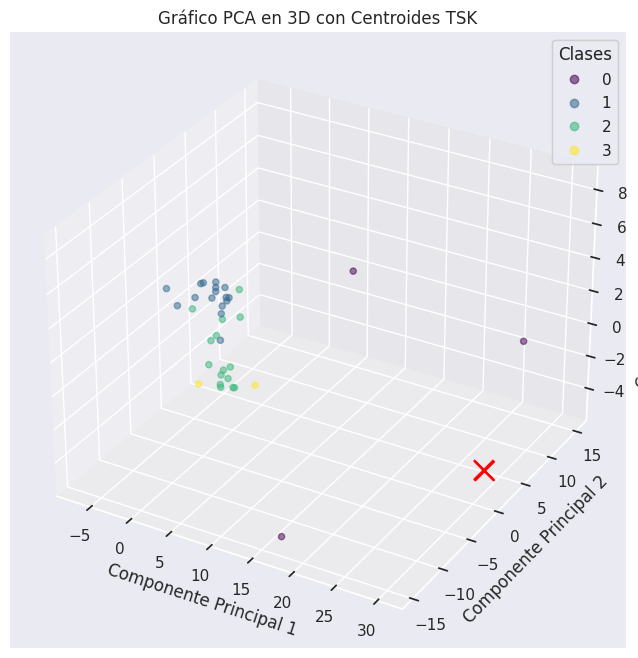

In [ ]:
# Ahora generemos el gráfico en 3D con PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

# Centros de los clusters en el espacio PCA
centros_pca = pca.transform(cntr)

# Crear figura y ejes 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Gráfico de dispersión de las muestras de datos en el espacio PCA
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=y, cmap='viridis', alpha=0.5)

# Gráfico de los centroides de los clusters en el espacio PCA
ax.scatter(centros_pca[:, 0], centros_pca[:, 1], centros_pca[:, 2], c='red', marker='x', s=200)

# Agregar leyenda
legend = ax.legend(*scatter.legend_elements(), title='Clases', loc='upper right')
ax.add_artist(legend)

# Etiquetas de los ejes
ax.set_xlabel('Componente Principal 1')
ax.set_ylabel('Componente Principal 2')
ax.set_zlabel('Componente Principal 3')

# Título del gráfico
plt.title('Gráfico PCA en 3D con Centroides TSK')

# Mostrar el gráfico
plt.show()

<h1>clasificación difusa basado en redes neuronales</h1>

El algoritmo FMMNN (Fuzzy Min-Max Neural Network) es una técnica difusa de clasificación. Combina conceptos de lógica difusa y redes neuronales para realizar tareas de clasificación en conjuntos de datos complejos y no lineales

In [ ]:
# Obtener las características y las etiquetas
X = df.drop('ESTADIOS', axis=1)
y = df['ESTADIOS']

# Definir el modelo FMMNN
class FMMNN:
    def __init__(self):
        self.centers = None
        self.betas = None

    def fit(self, X, y, beta=0.5):
        n_samples, n_features = X.shape
        n_classes = len(np.unique(y))

        centers = np.zeros((n_classes, n_features))
        betas = np.zeros(n_classes)

        for i in range(n_classes):
            X_class = X[y == i]
            centers[i] = np.mean(X_class, axis=0)
            betas[i] = beta * np.linalg.norm(X_class - centers[i], axis=1).max()

        self.centers = centers
        self.betas = betas

    def predict(self, X):
        n_samples = X.shape[0]
        n_classes = len(self.centers)

        u_pred = np.zeros((n_samples, n_classes))
        for i in range(n_samples):
            for j in range(n_classes):
                u_pred[i, j] = np.exp(-np.sum((X[i] - self.centers[j])**2) / self.betas[j]**2)

        y_pred = np.argmax(u_pred, axis=1)
        return y_pred

# Crear y entrenar el modelo FMMNN
fmmnn = FMMNN()
fmmnn.fit(X.values, y.values)

# Realizar las predicciones en el conjunto de entrenamiento
y_pred = fmmnn.predict(X.values)

In [ ]:
# Calcular métricas de evaluación
accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred, average='weighted')
recall = recall_score(y, y_pred, average='weighted')
f1 = f1_score(y, y_pred, average='weighted')
confusion_mat = confusion_matrix(y, y_pred)
classification_rep = classification_report(y, y_pred, zero_division=1)

# Imprimir resultados
print("Precisión: {:.2f}%".format(precision * 100))
print("Exactitud: {:.2f}%".format(accuracy * 100))
print("Especificidad: {:.2f}%".format(recall * 100))
print("Puntuación F1: {:.2f}%".format(f1 * 100))
print("Matriz de confusión:\n", confusion_mat)
print("Reporte de clasificación:\n", classification_rep)

# Calcular el almacenamiento utilizado por el objeto
storage_size = sys.getsizeof(cntr) + sys.getsizeof(u_orig) + sys.getsizeof(u_test)

# Imprimir el almacenamiento
storage_size_kb = storage_size / 1024  # Convertir a kilobytes
storage_size_mb = storage_size / (1024 * 1024)  # Convertir a megabytes
print("Almacenamiento Utilizado: {} bytes, {} KB, {} MB".format(storage_size, storage_size_kb, storage_size_mb))

# Imprimir el tiempo de ejecución
minutes = int(execution_time / 60)
seconds = int(execution_time % 60)
milliseconds = int((execution_time % 1) * 1000)
print("Tiempo de Ejecución: {} minutos, {} segundos, {} milisegundos".format(minutes, seconds, milliseconds))

Precisión: 89.58%
Exactitud: 86.11%
Especificidad: 86.11%
Puntuación F1: 85.85%
Matriz de confusión:
 [[ 3  0  0  0]
 [ 0 12  4  0]
 [ 0  0 15  0]
 [ 0  0  1  1]]
Reporte de clasificación:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      0.75      0.86        16
           2       0.75      1.00      0.86        15
           3       1.00      0.50      0.67         2

    accuracy                           0.86        36
   macro avg       0.94      0.81      0.85        36
weighted avg       0.90      0.86      0.86        36

Almacenamiento Utilizado: 7624 bytes, 7.4453125 KB, 0.00727081298828125 MB
Tiempo de Ejecución: 0 minutos, 0 segundos, 8 milisegundos


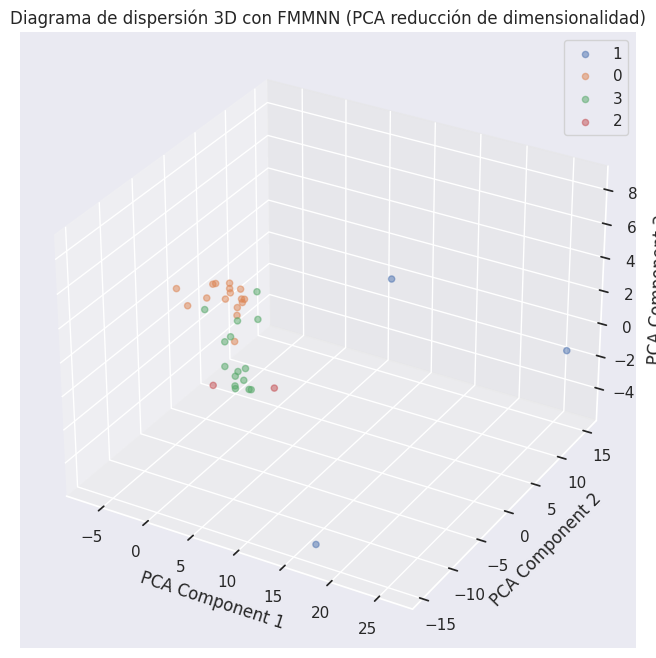

In [ ]:
# Crear el gráfico de dispersión 3D con las variables lingüísticas de ESTADIOS
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Graficar cada categoría por separado
for categoria_num in range(num_categorias):
    ax.scatter(
        X_pca[y == categoria_num, 0],
        X_pca[y == categoria_num, 1],
        X_pca[y == categoria_num, 2],
        label=categorias_estadios[categoria_num],  # Mostrar el nombre de la categoría en la leyenda
        alpha=0.5
    )

# Etiquetas de los ejes
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')

# Título del gráfico
ax.set_title('Diagrama de dispersión 3D con FMMNN (PCA reducción de dimensionalidad)')

# Mostrar leyenda con las categorías de ESTADIOS y sus respectivas etiquetas
ax.legend(labels=categorias_estadios)

# Mostrar el gráfico
plt.show()